<a href="https://colab.research.google.com/github/Khomkrit007/bsc_dpdm24/blob/main/Chapter_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [4]:
import pandas as pd
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
apndx_data = pd.read_csv("/content/drive/MyDrive/มหาลัยขอนแก่น/3-2/Data prepare & Data Mining/bsc_dpdm24_data/appendix_cancer_prediction_dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


In [6]:
apndx_data.shape

(260000, 25)

In [7]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [8]:
apndx_data['Chronic_Diseases']

,Chronic_Diseases
0,Diabetes
1,Diabetes
2,Diabetes
3,NaN
4,Hypertension
...,...
259995,Diabetes
259996,Hypertension
259997,NaN
259998,NaN


In [9]:
apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].fillna('No')

In [10]:
apndx_data['Chronic_Diseases']

,Chronic_Diseases
0,Diabetes
1,Diabetes
2,Diabetes
3,No
4,Hypertension
...,...
259995,Diabetes
259996,Hypertension
259997,No
259998,No


In [11]:
apndx_data['Treatment_Type']

,Treatment_Type
0,Surgery
1,Chemotherapy
2,Chemotherapy
3,Radiation
4,Radiation
...,...
259995,Surgery
259996,Radiation
259997,Chemotherapy
259998,Radiation


In [12]:
apndx_data[apndx_data['Treatment_Type'].isnull()]

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
16,PID_000017,China,51,Male,16.7,No,Low,No,No,Hypertension,...,293,7.2,4.8,175,Negative,Mild,300,NaN,5.8,No
23,PID_000024,China,64,Female,31.3,No,High,No,No,No,...,166,9.2,4.9,320,Negative,Severe,417,NaN,1.9,No
31,PID_000032,India,83,Female,28.9,No,High,Yes,No,Hypertension,...,271,5.7,4.5,373,Negative,Severe,172,NaN,14.0,No
36,PID_000037,China,34,Male,25.6,No,High,No,No,Hypertension,...,202,7.1,5.2,161,Negative,Moderate,140,NaN,4.0,No
46,PID_000047,China,83,Male,21.1,No,Low,No,No,No,...,272,8.8,5.2,212,Negative,Mild,321,NaN,4.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259945,PID_259946,China,82,Female,30.0,No,Moderate,No,No,No,...,299,8.1,5.4,156,Negative,Moderate,360,NaN,1.9,Yes
259957,PID_259958,Spain,35,Female,32.2,No,Low,No,No,Hypertension,...,150,7.7,4.3,208,Negative,Mild,392,NaN,2.5,No
259974,PID_259975,USA,25,Female,32.0,No,Low,Yes,Yes,No,...,201,8.9,5.7,194,Negative,Mild,38,NaN,1.5,No
259982,PID_259983,India,84,Female,22.6,No,High,No,No,Diabetes,...,255,8.2,5.6,261,Positive,Moderate,326,NaN,1.6,No


In [13]:
apndx_data['Treatment_Type'] = apndx_data['Treatment_Type'].fillna('No')

In [14]:
set(apndx_data['Symptom_Severity'])

{'Mild', 'Moderate', 'Severe'}

In [15]:
apndx_data.groupby(['Symptom_Severity','Appendix_Cancer_Prediction']).count()

Patient_ID  Country     Age  \
Symptom_Severity Appendix_Cancer_Prediction                                
Mild             No                              110229   110229  110229   
                 Yes                              19532    19532   19532   
Moderate         No                               77436    77436   77436   
                 Yes                              13761    13761   13761   
Severe           No                               33048    33048   33048   
                 Yes                               5994     5994    5994   

                                             Gender     BMI  Smoking_Status  \
Symptom_Severity Appendix_Cancer_Prediction                                   
Mild             No                          110229  110229          110229   
                 Yes                          19532   19532           19532   
Moderate         No                           77436   77436           77436   
                 Yes                          13761   13761           13761   
Severe           No                           33048   33048           33048   
                 Yes                           5994    5994            5994   

                                             Alcohol_Consumption  \
Symptom_Severity Appendix_Cancer_Prediction                        
Mild             No                                       110229   
                 Yes                                       19532   
Moderate         No                                        77436   
                 Yes                                       13761   
Severe           No                                        33048   
                 Yes                                        5994   

                                             Family_History_Cancer  \
Symptom_Severity Appendix_Cancer_Prediction                          
Mild             No                                         110229   
                 Yes                                         19532   
Moderate         No                                          77436   
                 Yes                                         13761   
Severe           No                                          33048   
                 Yes                                          5994   

                                             Genetic_Mutations  \
Symptom_Severity Appendix_Cancer_Prediction                      
Mild             No                                     110229   
                 Yes                                     19532   
Moderate         No                                      77436   
                 Yes                                     13761   
Severe           No                                      33048   
                 Yes                                      5994   

                                             Chronic_Diseases  ...  \
Symptom_Severity Appendix_Cancer_Prediction                    ...   
Mild             No                                    110229  ...   
                 Yes                                    19532  ...   
Moderate         No                                     77436  ...   
                 Yes                                    13761  ...   
Severe           No                                     33048  ...   
                 Yes                                     5994  ...   

                                             Previous_Cancers  Blood_Pressure  \
Symptom_Severity Appendix_Cancer_Prediction                                     
Mild             No                                    110229          110229   
                 Yes                                    19532           19532   
Moderate         No                                     77436           77436   
                 Yes                                    13761           13761   
Severe           No                                     33048           33048   
                 Yes                    

## ลบข้อมูลที่ได้หลังจากรู้ว่าเป็นหรือไม่เป็นมะเร็งแล้ว

In [16]:
apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis'])

In [17]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,No,No,179,236,6.7,4.9,396,Negative,Mild,No


## ลบข้อมูลที่ไม่น่าจะใช้สร้าง model ได้

In [18]:
apndx_data = apndx_data.drop(columns=['Patient_ID','Country'])

In [19]:
apndx_data.shape

(260000, 20)

## แปลง data ให้เป็นตัวเลขทั้งหมด

In [20]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      260000 non-null  object 
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  object 
 4   Alcohol_Consumption         260000 non-null  object 
 5   Family_History_Cancer       260000 non-null  object 
 6   Genetic_Mutations           260000 non-null  object 
 7   Chronic_Diseases            260000 non-null  object 
 8   Physical_Activity_Level     260000 non-null  object 
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  object 
 11  Previous_Cancers            260000 non-null  object 
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [21]:
set(apndx_data['Physical_Activity_Level'])

{'High', 'Low', 'Moderate'}

In [22]:
# prompt: transform string into integer

mapping = {'No': 0, 'Yes': 1}
apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map(mapping)

mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map(mapping)

mapping = {'No': 0, 'Yes': 1}
apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map(mapping)

mapping = {'No': 0, 'Yes': 1}
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map(mapping)

mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map(mapping)

mapping = {'No': 0, 'Yes': 1}
apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map(mapping)

mapping = {'No': 0, 'Yes': 1}
apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map(mapping)

mapping = {'Negative': 0, 'Positive': 1}
apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map(mapping)

mapping = {'Mild': 0, 'Moderate': 1, 'Severe': 2}
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map(mapping)

apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      260000 non-null  object 
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  int64  
 4   Alcohol_Consumption         260000 non-null  int64  
 5   Family_History_Cancer       260000 non-null  int64  
 6   Genetic_Mutations           260000 non-null  int64  
 7   Chronic_Diseases            260000 non-null  object 
 8   Physical_Activity_Level     260000 non-null  int64  
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  int64  
 11  Previous_Cancers            260000 non-null  int64  
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [23]:
# prompt: transform Chronic_Diseases Gender Diet_Type using one-hot-encoder

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the specified columns
enc.fit(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']])

# Transform the data
encoded_data = enc.transform(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']]).toarray()

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(['Chronic_Diseases', 'Gender', 'Diet_Type']))

# Concatenate the encoded DataFrame with the original DataFrame
apndx_data = pd.concat([apndx_data, encoded_df], axis=1)

# Drop the original columns
apndx_data = apndx_data.drop(['Chronic_Diseases', 'Gender', 'Diet_Type'], axis=1)

# Display the updated DataFrame
apndx_data.head()


,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Appendix_Cancer_Prediction,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,Yes,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,No,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,No,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,No,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,No,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
mapping = {'No': 0, 'Yes': 1}
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map(mapping)
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            260000 non-null  int64  
 1   BMI                            260000 non-null  float64
 2   Smoking_Status                 260000 non-null  int64  
 3   Alcohol_Consumption            260000 non-null  int64  
 4   Family_History_Cancer          260000 non-null  int64  
 5   Genetic_Mutations              260000 non-null  int64  
 6   Physical_Activity_Level        260000 non-null  int64  
 7   Radiation_Exposure             260000 non-null  int64  
 8   Previous_Cancers               260000 non-null  int64  
 9   Blood_Pressure                 260000 non-null  int64  
 10  Cholesterol_Level              260000 non-null  int64  
 11  White_Blood_Cell_Count         260000 non-null  float64
 12  Red_Blood_Cell_Count          

# เก็บ Test เอาไว้ วัดผลตอนจบ

In [25]:
# prompt: ramdom sampling 60000 data and also keep the rest

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(apndx_data, train_size=200000, random_state=6)


print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (200000, 26)
Testing data shape: (60000, 26)


In [26]:
train_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,...,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786
1,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,...,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214


In [27]:
test_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,...,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927
1,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,...,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073


# เลือก Model ที่ดีที่สุด (Model Selection)

1.   Decision Tree
2.   (Short) Decision Tree
3.   Naïve Bayes

### แบ่ง data เป็น 10 ก้อน (Split data into 10 folds)

In [28]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=6)

In [29]:
X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

## Decision Tree

In [30]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier = DecisionTreeClassifier() #default
# train & # evaluation (cross validation)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [31]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.7244  0.725   0.7234  0.72525 0.72405 0.72005 0.72215 0.72535 0.7257
 0.7247 ]
Mean accuracy: 0.724005
Standard deviation: 0.0016526418244737849


## (Short) Decision Tree

In [32]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier2 = DecisionTreeClassifier(max_depth=5)
# train & # evaluation (cross validation)
cv_scores = cross_val_score(dt_classifier2, X_train, y_train, cv=kf, scoring='accuracy')

In [33]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.8491  0.8486  0.84905 0.84875 0.84895 0.8506  0.84955 0.8494  0.84525
 0.8493 ]
Mean accuracy: 0.848855
Standard deviation: 0.0013115734825010974


## Naïve Bayes

In [34]:
#import
from sklearn.naive_bayes import GaussianNB
#define
nb_classifier = GaussianNB()
# train & # evaluation (cross validation)
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [35]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.84915 0.84865 0.8491  0.8473  0.84905 0.8506  0.84955 0.8496  0.8454
 0.8494 ]
Mean accuracy: 0.84878
Standard deviation: 0.0013749909090608461


# เลือก Model ที่แม่นที่สุด คือ (Short) Tree มา train ด้วย all training data

In [36]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier2 = DecisionTreeClassifier(max_depth=5)
# train
dt_classifier2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

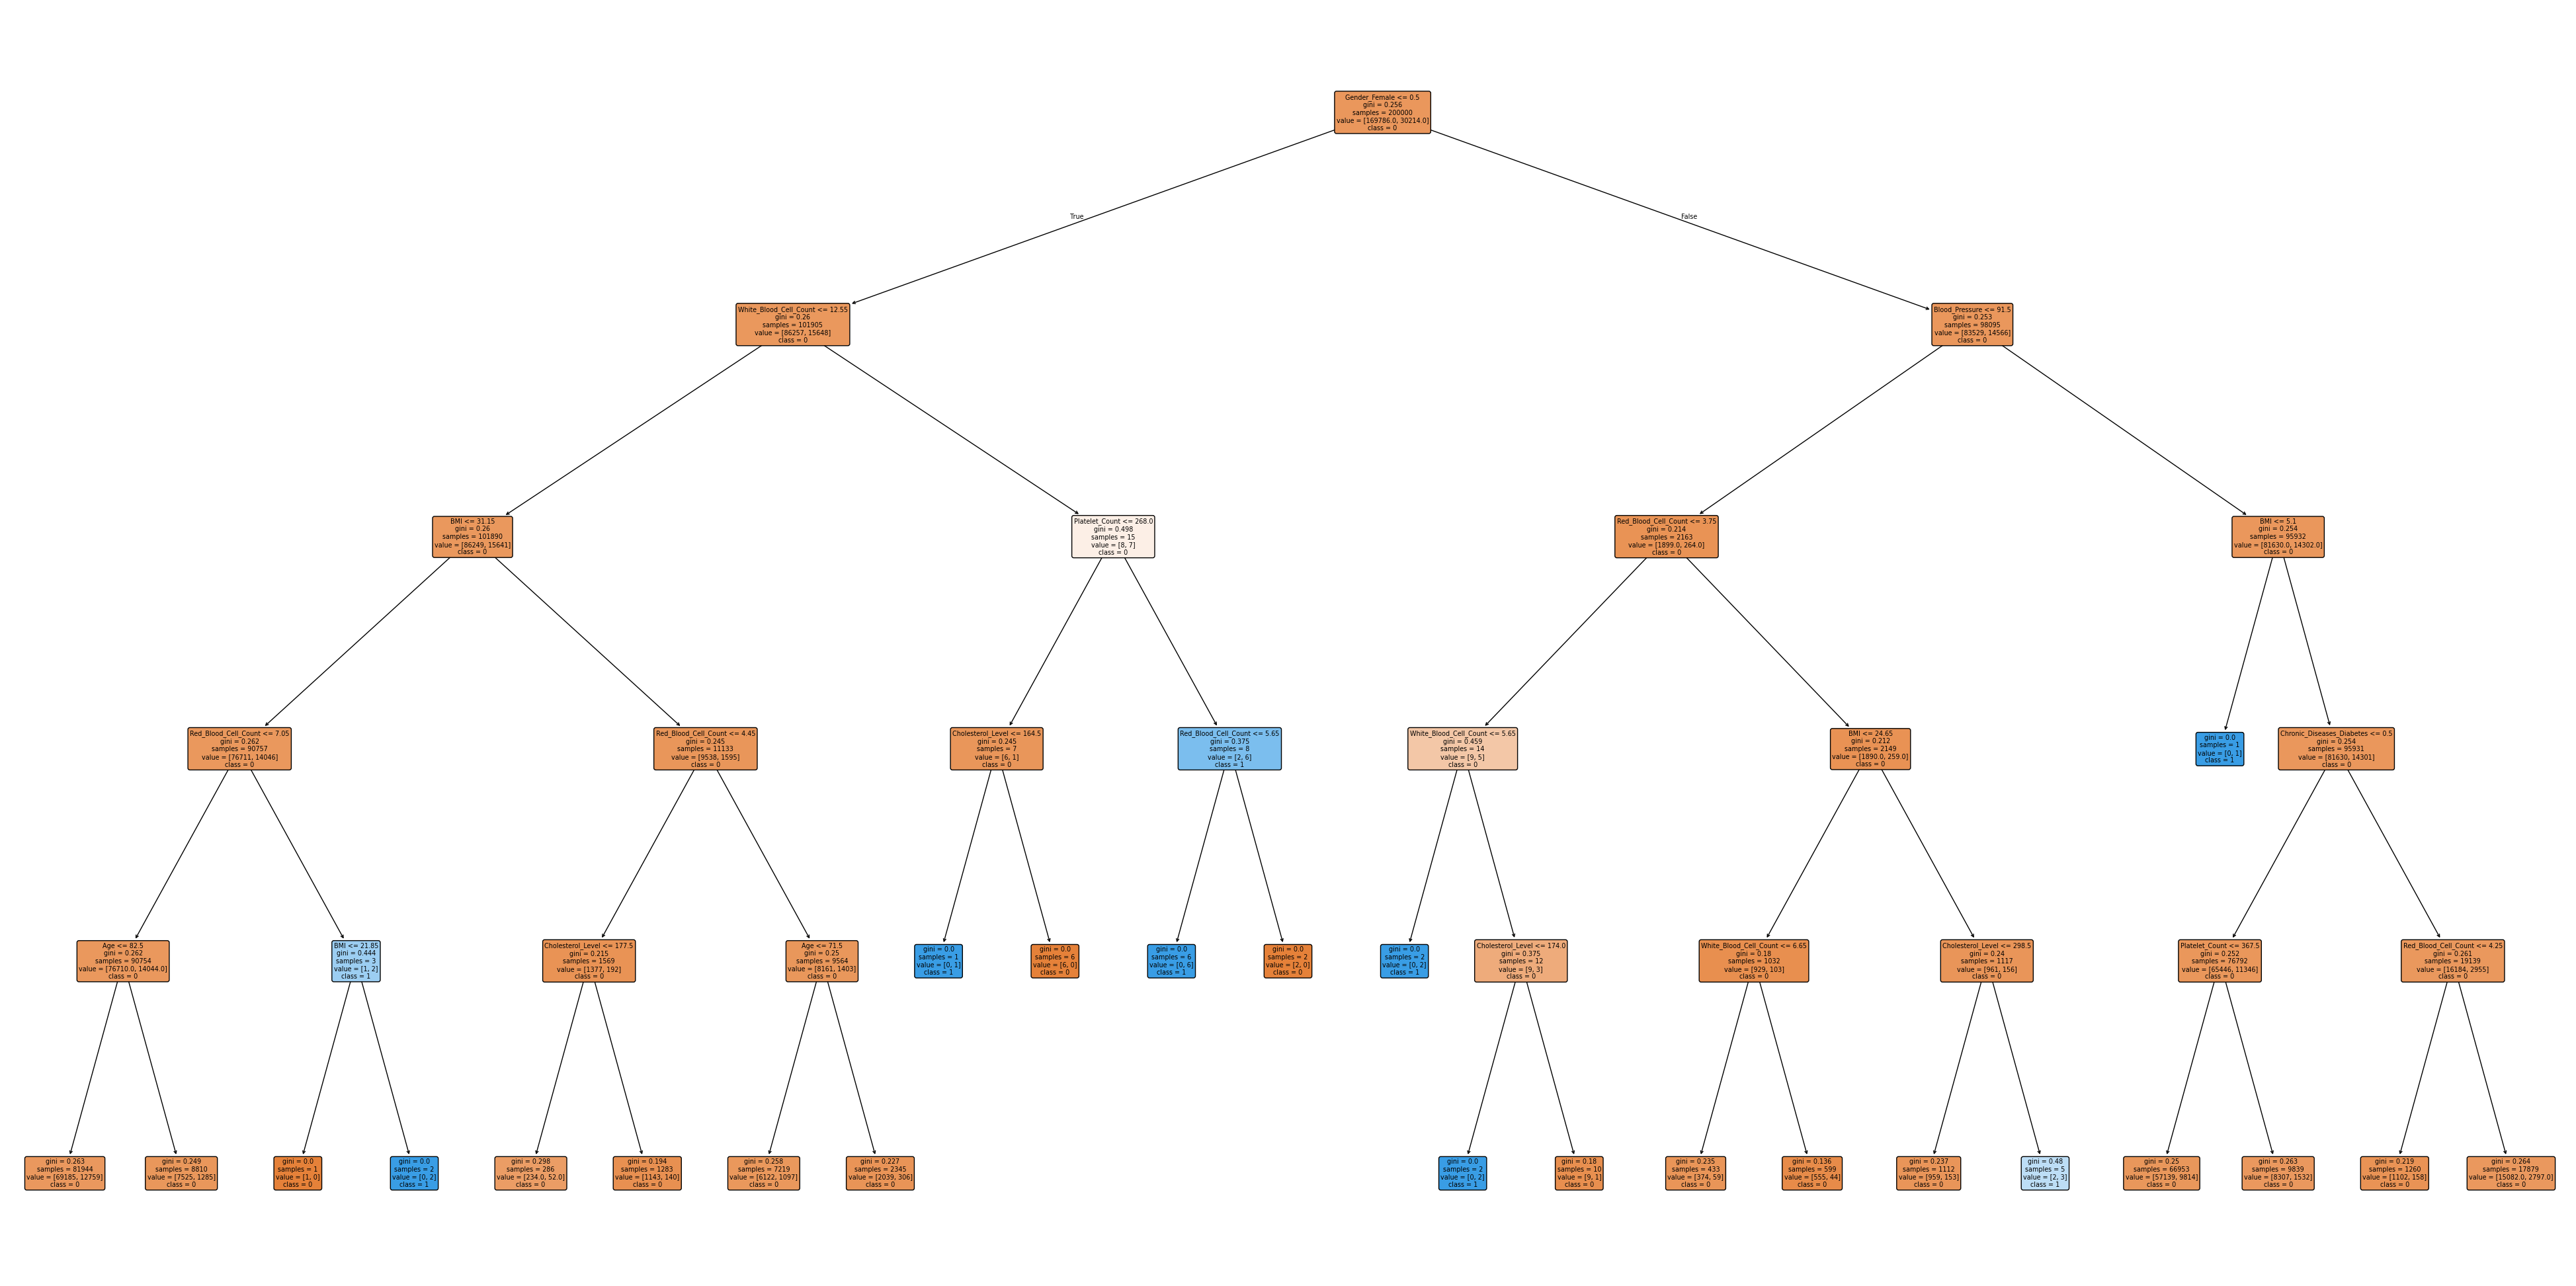

In [37]:
# prompt: show the trained tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_classifier2 is your trained decision tree model
plt.figure(figsize=(50,25))
plot_tree(dt_classifier2, filled=True, feature_names=X_train.columns, class_names=['0','1'], rounded=True)
plt.show()

# วัดผล ด้วย test data

In [38]:
X_test = test_data.drop('Appendix_Cancer_Prediction', axis=1)
y_actual = test_data['Appendix_Cancer_Prediction']

In [39]:
#predict
y_pred = dt_classifier2.predict(X_test)

In [40]:
#evaluate
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_actual, y_pred)
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.8487333333333333


# Quiz 12 หาต้นไม้ตัดสินใจที่มี average cross-validation accuracy มากกว่า 84.89%

In [41]:
# prompt: หาต้นไม้ตัดสินใจที่มี average cross-validation accuracy มากกว่า 84.89%


apndx_data = pd.read_csv("/content/drive/MyDrive/มหาลัยขอนแก่น/3-2/Data prepare & Data Mining/bsc_dpdm24_data/appendix_cancer_prediction_dataset.csv")

apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].fillna('No')
apndx_data['Treatment_Type'] = apndx_data['Treatment_Type'].fillna('No')

apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis'])
apndx_data = apndx_data.drop(columns=['Patient_ID','Country'])

mapping = {'No': 0, 'Yes': 1}
apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map(mapping)

mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map(mapping)

mapping = {'No': 0, 'Yes': 1}
apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map(mapping)

mapping = {'No': 0, 'Yes': 1}
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map(mapping)

mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map(mapping)

mapping = {'No': 0, 'Yes': 1}
apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map(mapping)

mapping = {'No': 0, 'Yes': 1}
apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map(mapping)

mapping = {'Negative': 0, 'Positive': 1}
apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map(mapping)

mapping = {'Mild': 0, 'Moderate': 1, 'Severe': 2}
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map(mapping)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']])
encoded_data = enc.transform(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(['Chronic_Diseases', 'Gender', 'Diet_Type']))
apndx_data = pd.concat([apndx_data, encoded_df], axis=1)
apndx_data = apndx_data.drop(['Chronic_Diseases', 'Gender', 'Diet_Type'], axis=1)

mapping = {'No': 0, 'Yes': 1}
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map(mapping)


train_data, test_data = train_test_split(apndx_data, train_size=200000, random_state=6)

kf = KFold(n_splits=10, shuffle=True, random_state=6)
X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

best_dt_classifier = None
best_mean_accuracy = 0

for max_depth in range(1, 21): # ลองค่า max_depth ตั้งแต่ 1 ถึง 20
  dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=6) # เพิ่ม random_state เพื่อให้ผลลัพธ์เหมือนเดิมทุกครั้ง
  cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')
  mean_accuracy = cv_scores.mean()
  print(f"Max Depth: {max_depth}, Mean Accuracy: {mean_accuracy}")
  if mean_accuracy > 0.8489 and mean_accuracy > best_mean_accuracy:
      best_mean_accuracy = mean_accuracy
      best_dt_classifier = dt_classifier

if best_dt_classifier:
    print(f"\nBest Decision Tree Classifier found with max_depth = {best_dt_classifier.max_depth} and Mean Accuracy: {best_mean_accuracy}")
    best_dt_classifier.fit(X_train, y_train)

    plt.figure(figsize=(50,25))
    plot_tree(best_dt_classifier, filled=True, feature_names=X_train.columns, class_names=['0','1'], rounded=True)
    plt.show()

    X_test = test_data.drop('Appendix_Cancer_Prediction', axis=1)
    y_actual = test_data['Appendix_Cancer_Prediction']
    y_pred = best_dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_actual, y_pred)
    print(f"Accuracy on test data: {accuracy}")
else:
    print("\nNo Decision Tree Classifier found with average cross-validation accuracy greater than 84.89%")


Max Depth: 1, Mean Accuracy: 0.8489299999999999
Max Depth: 2, Mean Accuracy: 0.8489199999999999
Max Depth: 3, Mean Accuracy: 0.8489149999999999
Max Depth: 4, Mean Accuracy: 0.8488749999999999
Max Depth: 5, Mean Accuracy: 0.84887
Max Depth: 6, Mean Accuracy: 0.8487549999999999
Max Depth: 7, Mean Accuracy: 0.84867
Max Depth: 8, Mean Accuracy: 0.8483850000000001
Max Depth: 9, Mean Accuracy: 0.8477750000000001
Max Depth: 10, Mean Accuracy: 0.8472
Max Depth: 11, Mean Accuracy: 0.8462299999999999
Max Depth: 12, Mean Accuracy: 0.8450900000000001
Max Depth: 13, Mean Accuracy: 0.843235


KeyboardInterrupt: 

Max Depth: 1, Mean Accuracy: 0.8489299999999999
Max Depth: 2, Mean Accuracy: 0.8489199999999999
Max Depth: 3, Mean Accuracy: 0.8489149999999999
Max Depth: 4, Mean Accuracy: 0.8488749999999999

Best Decision Tree Classifier found with max_depth = 1 and Mean Accuracy: 0.8489299999999999


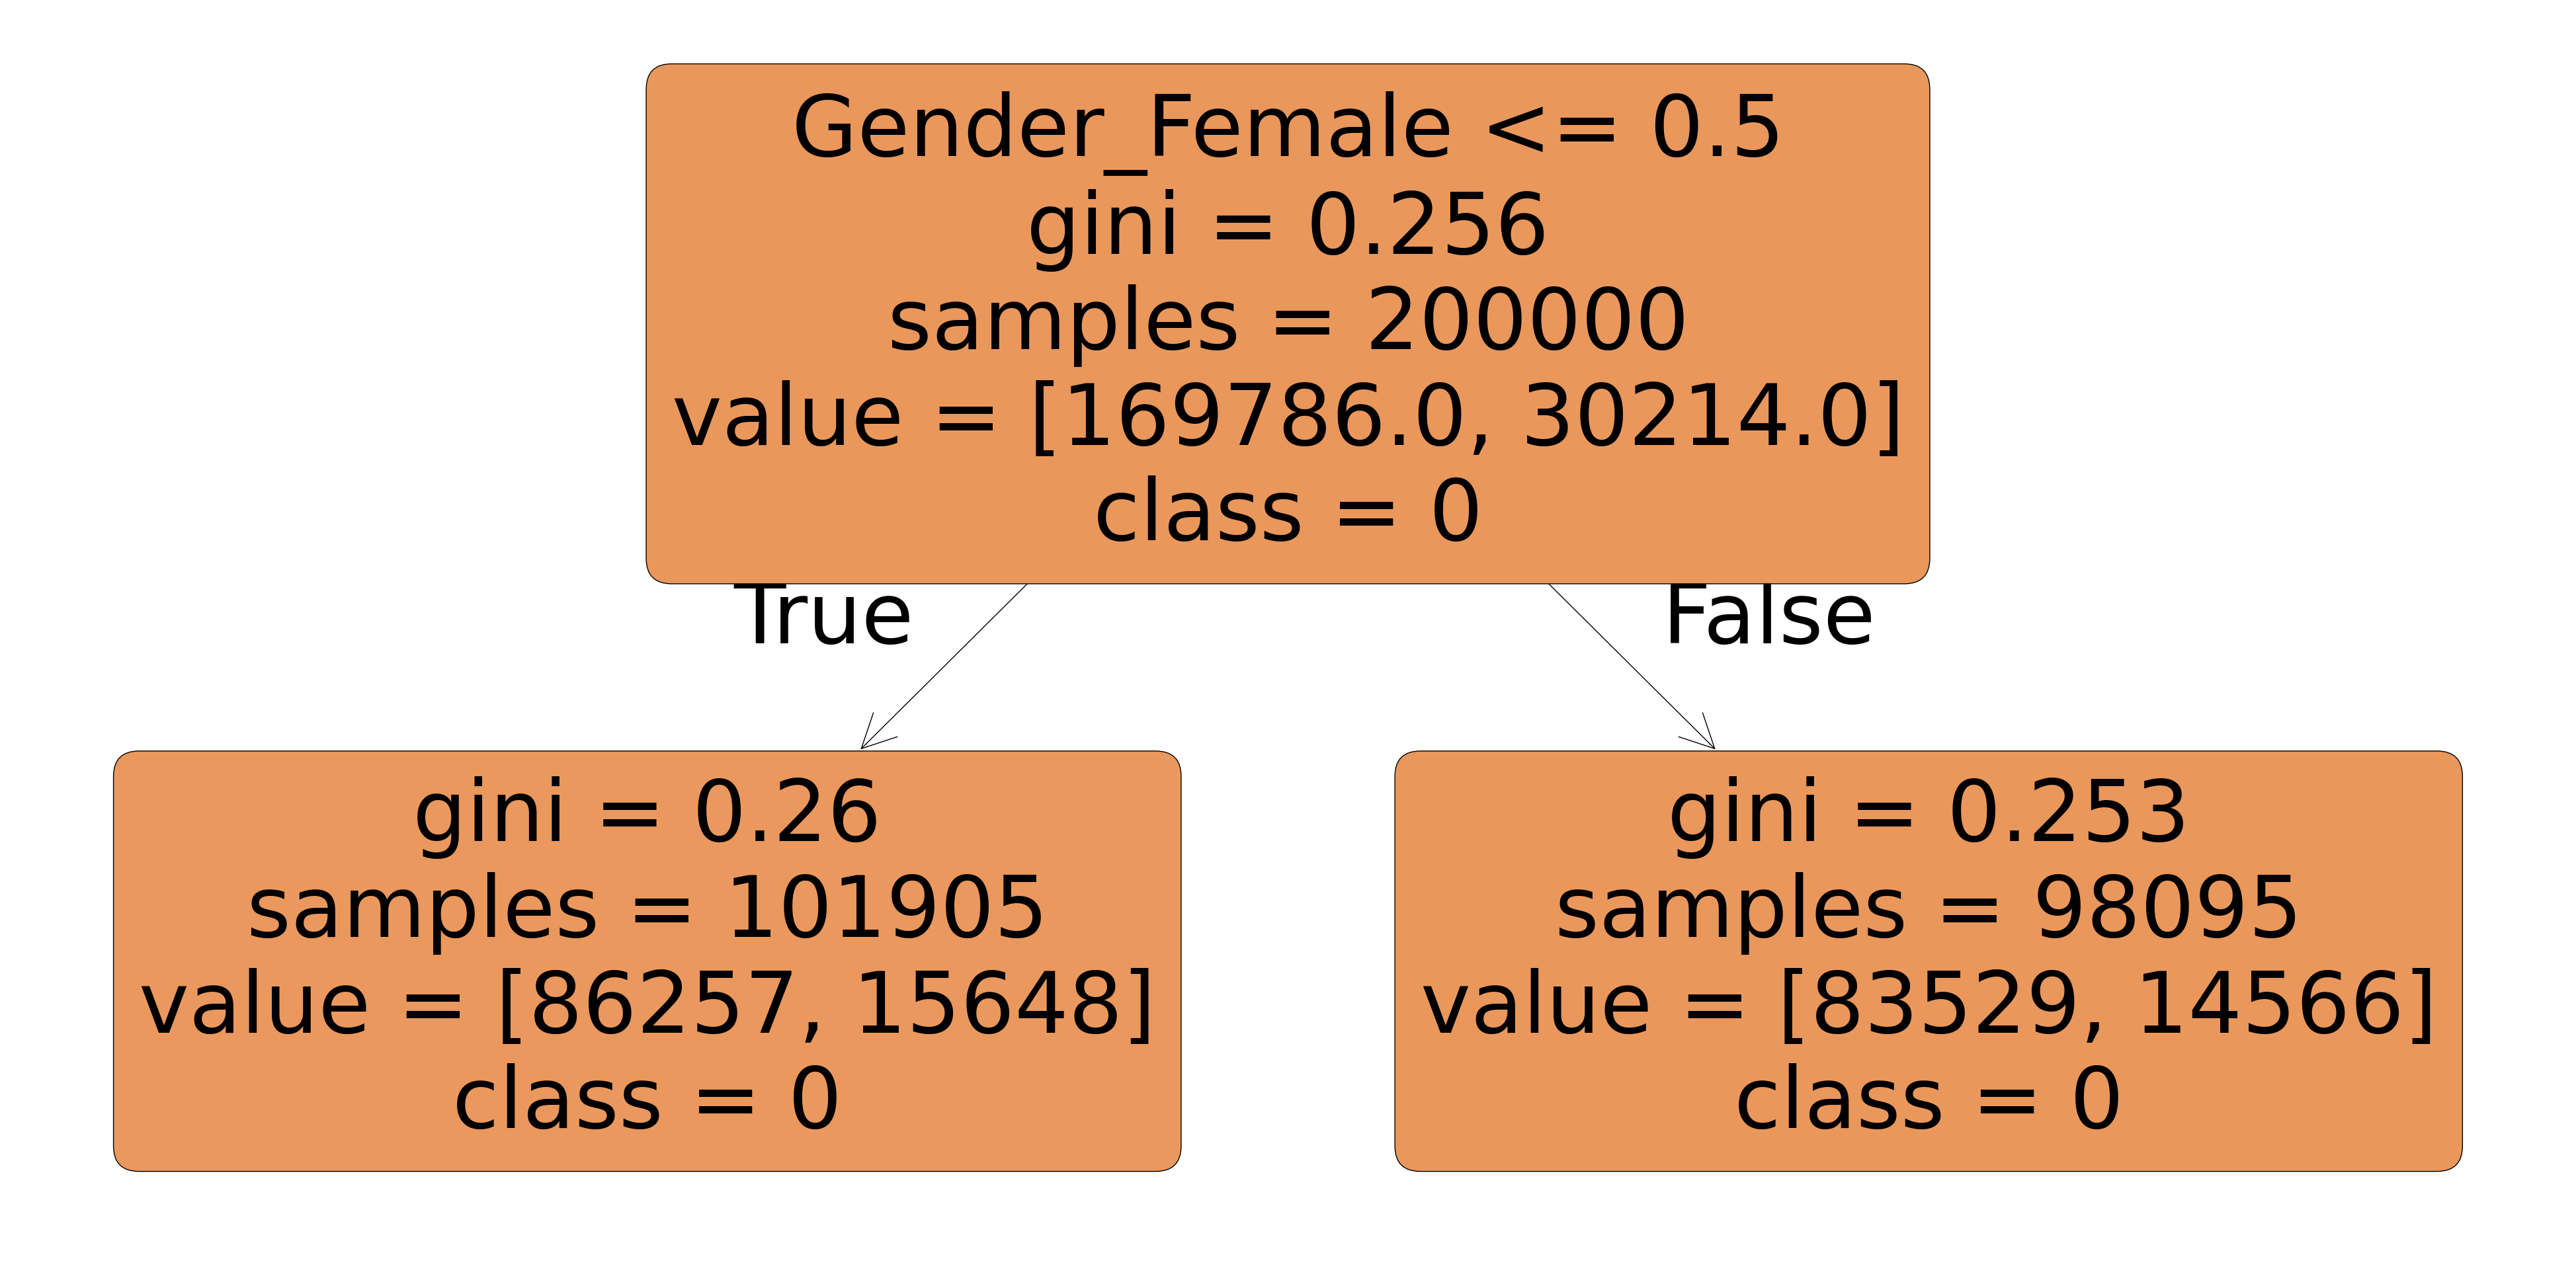

Accuracy on test data: 0.8487833333333333


In [51]:


# แปลงค่าของ chronic_diseases และข้อมูลอื่นๆ ให้เรียบร้อย
apndx_data = pd.read_csv("/content/drive/MyDrive/มหาลัยขอนแก่น/3-2/Data prepare & Data Mining/bsc_dpdm24_data/appendix_cancer_prediction_dataset.csv")
apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].fillna('No')
apndx_data['Treatment_Type'] = apndx_data['Treatment_Type'].fillna('No')

# Drop columns ที่ไม่จำเป็น
apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis', 'Patient_ID', 'Country'])

# Mapping categorical columns
mappings = {
    'Smoking_Status': {'No': 0, 'Yes': 1},
    'Alcohol_Consumption': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Family_History_Cancer': {'No': 0, 'Yes': 1},
    'Genetic_Mutations': {'No': 0, 'Yes': 1},
    'Physical_Activity_Level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Radiation_Exposure': {'No': 0, 'Yes': 1},
    'Previous_Cancers': {'No': 0, 'Yes': 1},
    'Tumor_Markers': {'Negative': 0, 'Positive': 1},
    'Symptom_Severity': {'Mild': 0, 'Moderate': 1, 'Severe': 2},
    'Appendix_Cancer_Prediction': {'No': 0, 'Yes': 1}
}

for col, mapping in mappings.items():
    apndx_data[col] = apndx_data[col].map(mapping)

# One-hot encode categorical variables
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']])
encoded_data = enc.transform(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(['Chronic_Diseases', 'Gender', 'Diet_Type']))
apndx_data = pd.concat([apndx_data, encoded_df], axis=1)
apndx_data = apndx_data.drop(['Chronic_Diseases', 'Gender', 'Diet_Type'], axis=1)

# Split data into train and test sets
train_data, test_data = train_test_split(apndx_data, train_size=200000, random_state=6)
kf = KFold(n_splits=10, shuffle=True, random_state=6)
X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

best_dt_classifier = None
best_mean_accuracy = 0

# Train DecisionTreeClassifier
for max_depth in range(1, 5):  # ทดลองค่าความลึก 1 ถึง 20
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=6)
    cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f"Max Depth: {max_depth}, Mean Accuracy: {mean_accuracy}")
    if mean_accuracy > 0.8489 and mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_dt_classifier = dt_classifier

if best_dt_classifier:
    print(f"\nBest Decision Tree Classifier found with max_depth = {best_dt_classifier.max_depth} and Mean Accuracy: {best_mean_accuracy}")
    best_dt_classifier.fit(X_train, y_train)

    # Visualize the tree
    plt.figure(figsize=(50, 25))
    plot_tree(best_dt_classifier, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
    plt.show()

    # Test model on unseen data
    X_test = test_data.drop('Appendix_Cancer_Prediction', axis=1)
    y_actual = test_data['Appendix_Cancer_Prediction']
    y_pred = best_dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_actual, y_pred)
    print(f"Accuracy on test data: {accuracy}")
else:
    print("\nNo Decision Tree Classifier found with average cross-validation accuracy greater than 84.89%")
